In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data_path = r'C:\Users\raga\OneDrive\SpringBoard\Capstone\MOOC\data\complete\\'
enrollments = pd.read_csv(data_path+'enrollment_train.csv')
events     =  pd.read_csv(data_path+'log_train.csv')
results    =  pd.read_csv(data_path+'truth_train.csv')
dates      =  pd.read_csv(data_path+'date.csv')
objects      =  pd.read_csv(data_path+'object.csv')

In [81]:
course_students_count = enrollments.groupby('course_id' , as_index=False).username.count().sort_values(by = 'username', ascending= False)


In [111]:
course_modules_count = objects.groupby('course_id' , as_index=False).module_id.count()


In [121]:
enrollments_results = pd.merge(enrollments , results , left_on = 'enrollment_id'  , right_on = '1')
a = enrollments_results.groupby('course_id' )['0'].value_counts()
a1= a.unstack('course_id').T
a1['sum'] = a1[0] + a1[1]
a1['dropout'] = np.round((a1[1]/a1['sum']),2)
a1['Notdropped'] = 1 - a1['dropout']
a2 = a1.sort_values('dropout' , ascending = True )
a3 = a2.reset_index()
course_dropout_rate = a3
course_module_dropout_rate = pd.merge (course_dropout_rate , course_modules_count , on ='course_id')
course_module_dropout_rate.head(1)

#a1[['dropout','Notdropped']].plot(kind = 'bar',title = 'Course wise drop outs')

0,course_id,0,1,sum,dropout,Notdropped,module_id
0,xMd9DzNyUCTLRPVbwWVzf4vq06oqrTT1,948,1848,2796,0.66,0.34,523


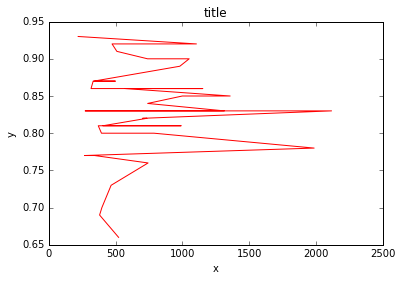

In [123]:
from pylab import *
figure()
plot(course_module_dropout_rate['module_id'], course_module_dropout_rate['dropout'], 'r')
xlabel('x')
ylabel('y')
title('title')
show()

In [3]:
events['source_cat'] = events['source'].astype('category') 
events['event_cat']  = events['event'].astype('category')
            

In [4]:
print (len(events))
dropout_data1 = pd.merge(events , results, left_on='enrollment_id' , right_on='1' )
print( len(dropout_data1))

dropout_data2 = pd.merge(dropout_data1, enrollments , on = 'enrollment_id' )
print (len(dropout_data2))

dropout_data3 = pd.merge(dropout_data2 , dates, on = 'course_id' )
print (len(dropout_data3) ) 



8157277
8156963
8156963
8156963


In [12]:
d1 = dropout_data3[['enrollment_id' ,'username', 'course_id' , 'from' , 'to' ,'source_cat','event_cat' , 'object' ,'0'  ]]

In [33]:

merged  = pd.merge (events , objects , left_on= 'object' , right_on ='module_id')


In [54]:
print ( events.event.unique())
print ( objects.category.unique())



['navigate' 'access' 'problem' 'page_close' 'video' 'discussion' 'wiki']
['about' 'chapter' 'course' 'course_info' 'html' 'outlink' 'problem'
 'sequential' 'static_tab' 'vertical' 'video' 'combinedopenended'
 'peergrading' 'discussion' 'dictation']


AttributeError: 'DataFrame' object has no attribute 'unique'

In [57]:
merged[['category','event']].groupby(['category' , 'event']).count()


,
category,event
chapter,access
combinedopenended,problem
problem,problem
sequential,access
video,video


In [ ]:
temp = d1[d1.course_id == 'SpATywNh6bZuzm8s1ceuBUnMUAeoAHHw']
pd.merge(temp , objects , left_on= 'object' , right_on ='module_id')

In [14]:
def findMetrics(x):
    result =  {'EventCount':x['event_cat'].count() , 'isDropOut':x['0'].iloc[0] }
    return pd.Series(result, name='metrics') 
a = d1.groupby(['enrollment_id']).apply(findMetrics)







In [23]:
results['0'].value_counts()

1    95581
0    24960
Name: 0, dtype: int64

In [32]:
# to group the data by occupation and then unstack it
inc2 = d1.groupby(['event_cat'])['0'].value_counts()
inc3 = inc2.unstack('event_cat').T
inc3[0]

event_cat
access        1880539
discussion     450907
navigate       499966
page_close     753187
problem        814582
video          467430
wiki            48480
Name: 0, dtype: int64

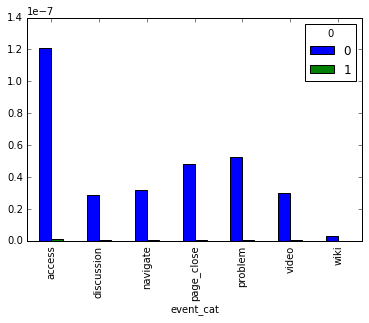

In [35]:
inc3[0] = inc3[0]/24960
inc3[1] = inc3[1]/95581


inc3.plot(kind='bar')

C:\Users\rvenkat\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x240e5743588>,
 'caps': [<matplotlib.lines.Line2D at 0x240e56d0da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x240e5654048>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x240e5654710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x240e5743240>,
  <matplotlib.lines.Line2D at 0x240e55cbc88>]}

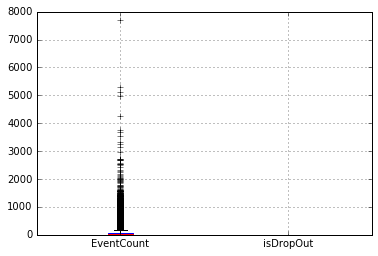

In [23]:
a[a.isDropOut =='0'].EventCount.boxplot()

C:\Users\rvenkat\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x240e5006278>,
 'caps': [<matplotlib.lines.Line2D at 0x240e4f93320>,
 'fliers': [<matplotlib.lines.Line2D at 0x240e4f0a240>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x240e4f88208>,
 'whiskers': [<matplotlib.lines.Line2D at 0x240e50066a0>,
  <matplotlib.lines.Line2D at 0x240e3dd3630>]}

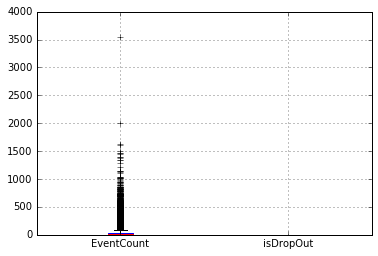

In [26]:
a[a.isDropOut ==1].boxplot()

In [40]:
course_modules = objects.groupby(['course_id'] , as_index=False).module_id.count()

In [62]:
course_results = d1[['enrollment_id' ,'course_id' , '0']].drop_duplicates()

In [84]:
t = course_results.groupby(['course_id'])['0'].value_counts()
t1 = t.unstack('course_id').T
t1= t1.reset_index()


In [91]:
course_module_results = pd.merge(course_modules , t1 , on='course_id'  )

In [90]:
course_modules.rename(columns={'module_id':'Modules_Count'}, inplace=True)


In [96]:
course_module_results.rename ( columns= {'0':'Not_Drop' ,'1':'Drop'} , inplace = True)

In [106]:
course_module_results.head(1)


course_module_results.modules_count

AttributeError: 'DataFrame' object has no attribute 'modules_count'

In [130]:
enrollment_events = events.groupby('enrollment_id' , as_index = False).event.count()
enrollment_event_results = pd.merge(results , enrollment_events , left_on = '1' , right_on = 'enrollment_id')


In [132]:
enrollment_event_results.head()

,1,0,enrollment_id,event
0,3,0,3,288
1,4,0,4,99
2,5,0,5,633
3,6,0,6,23
4,7,1,7,479


In [137]:
dropout_events = enrollment_event_results[enrollment_event_results['0'] == 1].event
not_dropout_events = enrollment_event_results[enrollment_event_results['0'] == 0].event


In [ ]:
dropout_events.plot(kind='bar')
not_dropout_events.plot(kind='bar')

In [ ]:
fig, ax = plt.subplots()

H = ax.hist(dropout_events, bins=50, alpha=0.5, histtype='stepfilled')